# Assignment 5, Question 7: Group Operations & Final Analysis

**Points: 15**

Perform grouped analysis and create summary reports.

## Setup

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities
from q3_data_utils import load_data, summarize_by_group

df = load_data('output/q6_transformed_data.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.
    
    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Basic Groupby (5 points)

1. Group by 'site' and calculate mean age, BMI, and blood pressure
2. Group by 'intervention_group' and count patients
3. Use the `summarize_by_group()` utility to get overall statistics by site

In [80]:
# TODO: Group by site
print(df.groupby("site")[["age","bmi","systolic_bp","diastolic_bp"]].mean())



              age        bmi  systolic_bp  diastolic_bp
site                                                   
site a  56.364005  25.874222   117.443166     73.538566
site b  62.401957  25.741949   117.083979     73.308194
site c  57.312108  25.769561   117.980222     73.650265
site d  63.491006  25.529714   117.796802     73.615590
site e  57.064897  25.443461   117.531957     73.755162


In [81]:
# TODO: Count by intervention group
print(df.groupby("intervention_group")["patient_id"].count())

intervention_group
control        3337
treatment a    3321
treatment b    3342
Name: patient_id, dtype: int64


**Note:** The `summarize_by_group()` function has an optional `agg_dict` parameter for custom aggregations. If you don't specify it, it will use `.describe()` on numeric columns. You can use `agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'}` for custom aggregations.


In [ ]:
# TODO: Use summarize_by_group utility
summary = summarize_by_group(df, "site")


Unnamed: 0                                                         \
            count         mean          std  min     25%     50%     75%   
site                                                                       
site a     2956.0  4987.819689  2910.927487  1.0  2403.0  4947.5  7522.5   
site b     2453.0  4986.490012  2893.910911  0.0  2523.0  4998.0  7453.0   
site c     2073.0  5024.333333  2851.081750  2.0  2599.0  5052.0  7483.0   
site d     1501.0  4984.088608  2884.414526  3.0  2461.0  4951.0  7492.0   
site e     1017.0  5036.956735  2881.019854  4.0  2572.0  5108.0  7558.0   

                   age             ... adherence_pct        cholesterol_ratio  \
           max   count       mean  ...           75%    max             count   
site                               ...                                          
site a  9999.0  2956.0  56.364005  ...          75.0  100.0            2956.0   
site b  9986.0  2453.0  62.401957  ...          75.0  100.0            2453.0   
site c  9997.0  2073.0  57.312108  ...          75.0  100.0            2073.0   
site d  9990.0  1501.0  63.491006  ...          75.0  100.0            1501.0   
site e  9989.0  1017.0  57.064897  ...          72.0  100.0            1017.0   

                                                                              
            mean       std       min       25%       50%       75%       max  
site                                                                          
site a  1.500081  0.729620  0.430108  0.972973  1.380952  1.864407  6.520000  
site b  1.487217  0.710854  0.434783  0.970588  1.377358  1.836066  6.655172  
site c  1.509473  0.785467  0.408163  0.964286  1.360000  1.854167  8.692308  
site d  1.459381  0.706996  0.412371  0.966667  1.314286  1.827586  6.103448  
site e  1.537991  0.766434  0.412371  0.981818  1.402778  1.910714  6.307692  

[5 rows x 104 columns]

## Part 2: Multiple Aggregations (5 points)

Group by 'site' and apply multiple aggregations:
- age: mean, std, min, max
- bmi: mean, std
- systolic_bp: mean, median

Display the results in a well-formatted table.

In [96]:
# TODO: Multiple aggregations
agg_dict={"age": ["mean","std","min","max"], "bmi": ["mean","std"], "systolic_bp": ["mean", "median"]}
int = summarize_by_group(df, "site",agg_dict)
display(int)

age                              bmi           systolic_bp  \
             mean         std  min  max       mean       std        mean   
site                                                                       
site a  56.364005  162.536292 -999  100  25.874222  4.991907  117.443166   
site b  62.401957  139.050180 -999  100  25.741949  5.048730  117.083979   
site c  57.312108  157.941868 -999  100  25.769561  5.420063  117.980222   
site d  63.491006  136.140058 -999  100  25.529714  5.952635  117.796802   
site e  57.064897  157.697644 -999  100  25.443461  6.121982  117.531957   

               
       median  
site           
site a  117.0  
site b  117.0  
site c  118.0  
site d  117.0  
site e  117.0

## Part 3: Comparative Analysis (5 points)

Compare intervention groups:
1. Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

In [84]:
# TODO: Intervention group comparisons
df["outcome_cvd"] = df["outcome_cvd"].map({"yes": 1, "no": 0})
cvd = df.groupby("intervention_group")["outcome_cvd"].mean()
print(cvd)
print()
pct = df.groupby("intervention_group")["adherence_pct"].mean()
print(pct)
print()
dropout = pd.crosstab(df["intervention_group"], df["dropout"])
print(dropout)

intervention_group
control        0.336530
treatment a    0.319482
treatment b    0.333633
Name: outcome_cvd, dtype: float64

intervention_group
control        60.826191
treatment a    60.223728
treatment b    61.020048
Name: adherence_pct, dtype: float64

dropout               no  yes
intervention_group           
control             2831  506
treatment a         2831  490
treatment b         2871  471


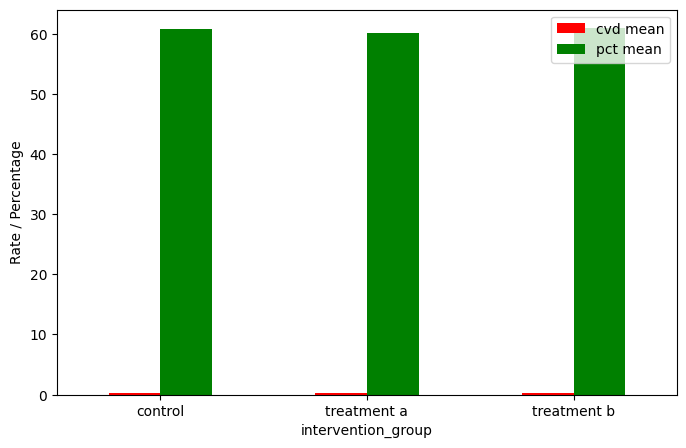

In [ ]:
# TODO: Visualization
summary_plot = pd.DataFrame({
    "cvd mean": cvd,
    "pct mean": pct
})
summary.plot(kind="bar",color=["red", "green"], figsize=(8,5))
plt.ylabel("Rate / Percentage")
plt.xticks(rotation=0)
plt.show()

## Part 4: Final Report

Create and save:
1. Summary statistics by site → `output/q7_site_summary.csv`
2. Intervention group comparison → `output/q7_intervention_comparison.csv`
3. Text report with key findings → `output/q7_analysis_report.txt`

In [99]:
# TODO: Save summary outputs
summary.to_csv('output/q7_site_summary.csv', index=False)
intervention_comp = pd.concat([cvd, pct, dropout], axis=1)
intervention_comp.to_csv('output/q7_intervention_comparison.csv', index=False)

with open("output/q7_analysis_report.txt", "w") as f:
    f.write("The mean ages for the sites vary, with side a being the youngest, and side d being the oldest.")
    f.write("Site e has the highest cholesterol ratio.")
    f.write("The bmi and systolic blood pressure means are the same overall in the sites.")
    f.write("The control group had the highest dropouts and mean outcome_cvd, but second lowest adherence_pct.")





## Summary

What are the 3 most important findings from your analysis?

**Key Findings:**

1. Treatment A seems to work slightly better than treatment B
2. Mean adherence is pretty much the same across all treatment groups, which means that it's probably unaffected by any treatment.
3. Dropout rate is consistent so the groups are comparable
